In [0]:
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib.gridspec import GridSpec


%matplotlib inline

plt.rcParams['figure.figsize'] = 10, 10

np.random.seed(42)

In [2]:
!pip install minisom

In [0]:
#Gerar dataset 1000 amostras de cada nucleo com ruido 
def dataset(n = 1000, sigma=1, m=4):
    
    centers = ([0,0,0,0,0,0,0,0], [m,0,0,0,0,0,0,0], [0,0,0,m,0,0,0,0], [0,0,0,0,0,0,0,m])

    n_dim = len(centers[0])
    dt = []
    labels = []
    for i in range(len(centers)):
        #for each center we generate n samples with additive standard gaussian noise
        for _ in range(n):    
            dt.append(centers[i] + sigma*np.random.randn(1, n_dim).reshape(n_dim, ))
            labels.append(i)

    data = np.append(dt, np.array(labels).reshape(4*n, 1), axis=1)
    
    return np.array(data)


In [4]:
dt = dataset(1000) #1000 samples for each center with noise
dt.shape

(4000, 9)

In [0]:
## SOM 
from minisom import MiniSom    

In [23]:
dim = 10
x_train = dt[:,:8]
y_train = dt[:,8]

som = MiniSom(dim, dim, 8, neighborhood_function='gaussian', sigma=1, random_seed=42) # initialization
som.random_weights_init(x_train)
#som.train_random(x_train, 10000) # trains the SOM
som.train_batch(x_train, 10000, verbose=True) # trains the SOM

 [ 10000 / 10000 ] 100% - 0.00080 it/s - quantization error: 2.277657319415243


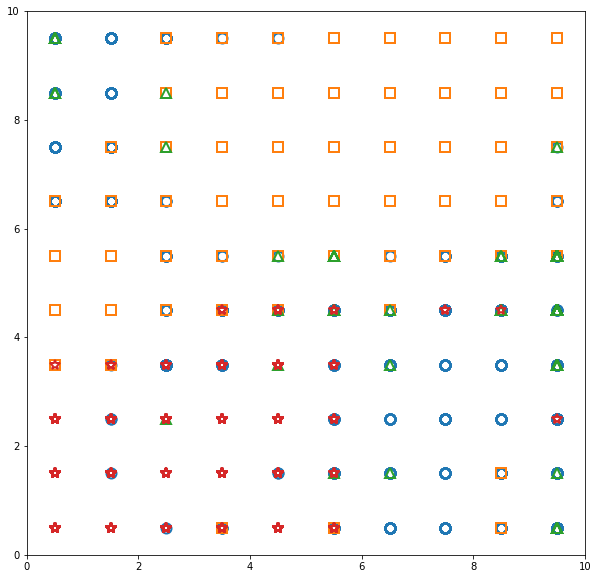

In [24]:
plt.figure(figsize=(10, 10))
# Plotting the response for each pattern in the iris dataset
#plt.pcolor(som.distance_map().T, cmap='Greys')  # plotting the distance map as background
#plt.colorbar()

#use different colors and markers for each label
t = np.array(y_train, dtype=int)
markers = ['o', 's', '^', '*' ]
colors = ['C0', 'C1', 'C2', 'C3']
for cnt, xx in enumerate(x_train):
    w = som.winner(xx)  # getting the winner
    # palce a marker on the winning position for the sample xx
    plt.plot(w[0]+.5, w[1]+.5, markers[t[cnt]], markerfacecolor='None',
             markeredgecolor=colors[t[cnt]], markersize=10, markeredgewidth=2)
plt.axis([0, dim, 0, dim])
plt.savefig('som_class_normal.png')
plt.show()

In [0]:
# labels_map = som.labels_map(x_train, y_train)
# label_names = np.unique(y_train)

# plt.figure(figsize=(7, 7))
# the_grid = GridSpec(dim, dim)
# for position in labels_map.keys():
#     label_fracs = [labels_map[position][l] for l in label_names]
#     plt.subplot(the_grid[6-position[1], position[0]], aspect=1)
#     patches, texts = plt.pie(label_fracs)
# plt.legend(patches, label_names, bbox_to_anchor=(0, 3), ncol=3)
# plt.savefig('som_iris_pies.png')
# plt.show()

In [0]:
dt2 = dataset(1000, m=10) #1000 samples for each center with noise
x_train = dt2[:,:8]
y_train = dt2[:,8]

In [26]:
dim = 10
# som = MiniSom(dim, dim, 8, neighborhood_function='gaussian', sigma=4.0, learning_rate=0.5) # initialization
# #som.random_weights_init(x_train)
# som.train_random(x_train, 10000) # trains the SOM

som = MiniSom(dim, dim, 8, neighborhood_function='gaussian', sigma=1.0, random_seed=42) # initialization
som.random_weights_init(x_train)
#som.train_random(x_train, 10000) # trains the SOM
som.train_batch(x_train, 10000, verbose=True) # trains the SOM

 [ 10000 / 10000 ] 100% - 0.00079 it/s - quantization error: 2.223155960160931


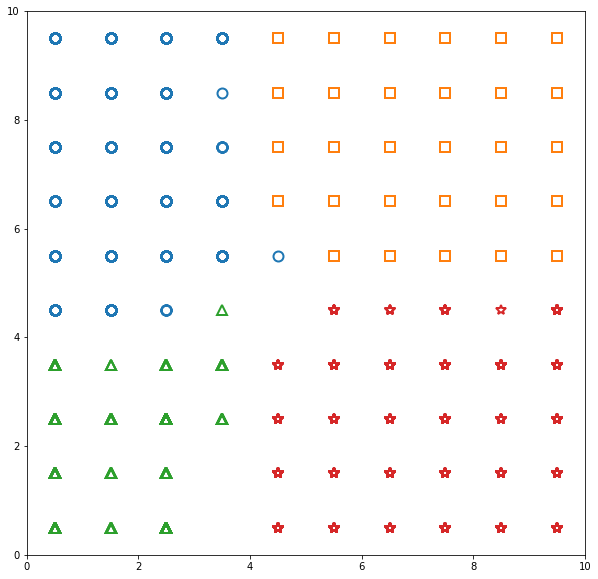

In [27]:
plt.figure(figsize=(10, 10))
# Plotting the response for each pattern in the iris dataset
#plt.pcolor(som.distance_map().T, cmap='Greys')  # plotting the distance map as background
#plt.colorbar()

#use different colors and markers for each label
t = np.array(y_train, dtype=int)
markers = ['o', 's', '^', '*' ]
colors = ['C0', 'C1', 'C2', 'C3']
for cnt, xx in enumerate(x_train):
    w = som.winner(xx)  # getting the winner
    # palce a marker on the winning position for the sample xx
    plt.plot(w[0]+.5, w[1]+.5, markers[t[cnt]], markerfacecolor='None',
             markeredgecolor=colors[t[cnt]], markersize=10, markeredgewidth=2)
plt.axis([0, dim, 0, dim])
plt.savefig('som_class_media.png')
plt.show()

In [28]:
dt3 = dataset(1000, sigma=0.1) #1000 samples for each center with noise
x_train = dt3[:,:8]
y_train = dt3[:,8]

# som = MiniSom(dim, dim, 8, neighborhood_function='gaussian', sigma=4.0, learning_rate=0.5) # initialization
# #som.random_weights_init(x_train)
# som.train_random(x_train, 10000) # trains the SOM

som = MiniSom(dim, dim, 8, neighborhood_function='gaussian', sigma=1.0, random_seed=42) # initialization
som.random_weights_init(x_train)
#som.train_random(x_train, 10000) # trains the SOM
som.train_batch(x_train, 10000, verbose=True) # trains the SOM


 [ 10000 / 10000 ] 100% - 0.00079 it/s - quantization error: 0.2265974723108024


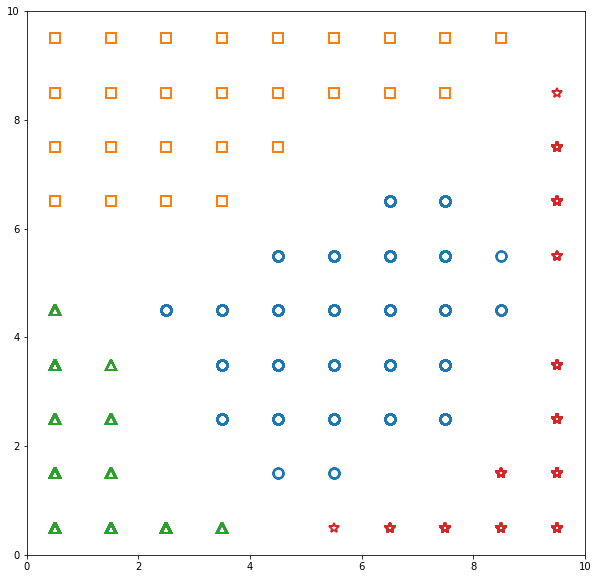

In [29]:
plt.figure(figsize=(10, 10))
# Plotting the response for each pattern in the iris dataset
#plt.pcolor(som.distance_map().T, cmap='Greys')  # plotting the distance map as background
#plt.colorbar()

#use different colors and markers for each label
t = np.array(y_train, dtype=int)
markers = ['o', 's', '^', '*' ]
colors = ['C0', 'C1', 'C2', 'C3']
for cnt, xx in enumerate(x_train):
    w = som.winner(xx)  # getting the winner
    # palce a marker on the winning position for the sample xx
    plt.plot(w[0]+.5, w[1]+.5, markers[t[cnt]], markerfacecolor='None',
             markeredgecolor=colors[t[cnt]], markersize=10, markeredgewidth=2)
plt.axis([0, dim, 0, dim])
plt.savefig('som_class_var.png')
plt.show()